In [1]:
import sys
sys.path.append("./../../src")
from visualizer_helper import Visualizer
from cluster_helper import ClusterProcessor

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import preprocessing
from scipy.sparse import csr_matrix
import scipy
import pickle
import os
from annoy import AnnoyIndex
from scipy.sparse.linalg import inv

from collections import Counter
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ashea2nd/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
cluster_assignments = pd.read_csv("./data/CLUSTER_ASSIGNMENTS.csv")
icd9codes = pd.read_csv("../../data/PATIENT_ICD_ICD9_CODES.csv")
patient_icd_binary = pickle.load(open("../../data/PATIENT_ICD_BINARY_SPARSE_CSR.p", 'rb'))
icd9diag = pd.read_csv("../../../mimic/D_ICD_DIAGNOSES.csv.gz")
icd9proc = pd.read_csv("../../../mimic/D_ICD_PROCEDURES.csv.gz")
k_neighbors = 50

In [3]:
clusters, counts = np.unique(cluster_assignments["CLUSTER"], return_counts=True)
clusters_by_size = sorted(list(zip(clusters, counts)), key=lambda p: p[1], reverse=True)

In [4]:
cp = ClusterProcessor(patient_icd_binary, icd9codes, icd9diag, cluster_assignments, k_neighbors,
                        other_stopwords = ["hypertension", 'disorder'])

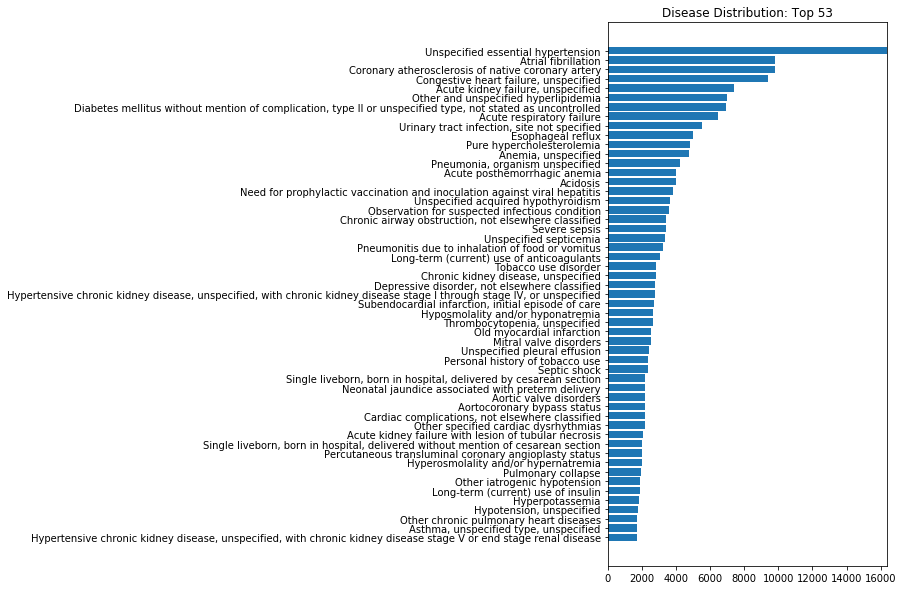

[('4019', 'Unspecified essential hypertension', 16361), ('42731', 'Atrial fibrillation', 9803), ('41401', 'Coronary atherosclerosis of native coronary artery', 9786), ('4280', 'Congestive heart failure, unspecified', 9405), ('5849', 'Acute kidney failure, unspecified', 7397), ('2724', 'Other and unspecified hyperlipidemia', 7016), ('25000', 'Diabetes mellitus without mention of complication, type II or unspecified type, not stated as uncontrolled', 6921), ('51881', 'Acute respiratory failure', 6479), ('5990', 'Urinary tract infection, site not specified', 5538), ('53081', 'Esophageal reflux', 4971), ('2720', 'Pure hypercholesterolemia', 4796), ('2859', 'Anemia, unspecified', 4768), ('486', 'Pneumonia, organism unspecified', 4256), ('2851', 'Acute posthemorrhagic anemia', 4012), ('2762', 'Acidosis', 4005), ('V053', 'Need for prophylactic vaccination and inoculation against viral hepatitis', 3835), ('2449', 'Unspecified acquired hypothyroidism', 3633), ('V290', 'Observation for suspected

In [5]:
print(cp.plot_disease_distribution(53))

2132


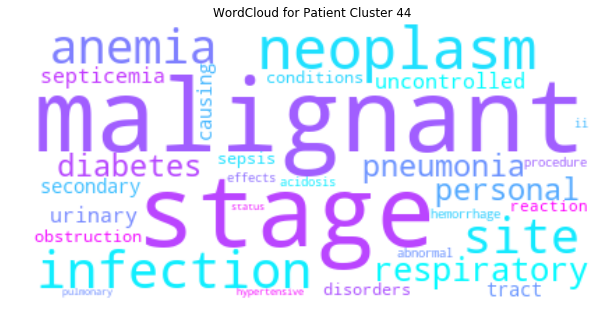

Counter({'malignant': 1428, 'stage': 1392, 'neoplasm': 1357, 'infection': 1311, 'site': 1137, 'anemia': 1074, 'respiratory': 997, 'pneumonia': 875, 'personal': 848, 'diabetes': 848, 'septicemia': 815, 'urinary': 765, 'uncontrolled': 753, 'secondary': 750, 'tract': 724, 'causing': 704, 'conditions': 630, 'obstruction': 623, 'disorders': 612, 'sepsis': 611, 'reaction': 594, 'hemorrhage': 586, 'ii': 571, 'effects': 568, 'procedure': 562, 'acidosis': 558, 'abnormal': 546, 'hypertensive': 538, 'status': 537, 'pulmonary': 527, 'stated': 527, 'organism': 510, 'ulcer': 488, 'adverse': 480, 'therapeutic': 480, 'renal': 458, 'liver': 445, 'severe': 433, 'operation': 417, 'iv': 408, 'time': 394, 'shock': 393, 'patient': 392, 'later': 386, 'misadventure': 386, 'necrosis': 372, 'embolism': 371, 'infarction': 360, 'current': 353, 'cardiac': 352, 'hepatitis': 342, 'staphylococcus': 335, 'inhalation': 332, 'lung': 329, 'lower': 329, 'pressure': 325, 'mellitus': 320, 'manifestations': 318, 'food': 313,

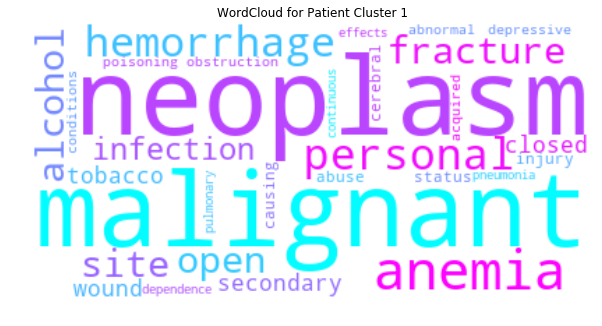

Counter({'neoplasm': 892, 'malignant': 869, 'anemia': 596, 'personal': 559, 'hemorrhage': 541, 'site': 445, 'fracture': 442, 'alcohol': 431, 'open': 429, 'infection': 411, 'secondary': 403, 'wound': 387, 'tobacco': 368, 'closed': 364, 'injury': 361, 'causing': 356, 'status': 343, 'cerebral': 331, 'abuse': 329, 'poisoning': 326, 'depressive': 325, 'obstruction': 320, 'acquired': 320, 'abnormal': 308, 'conditions': 292, 'dependence': 286, 'pneumonia': 281, 'continuous': 279, 'pulmonary': 278, 'effects': 270, 'reaction': 266, 'disorders': 263, 'operation': 260, 'loss': 249, 'consciousness': 245, 'hepatitis': 238, 'tract': 236, 'urinary': 232, 'hypothyroidism': 229, 'epilepsy': 225, 'asthma': 223, 'procedure': 220, 'fall': 217, 'therapeutic': 212, 'patient': 208, 'adverse': 207, 'infarction': 206, 'later': 204, 'misadventure': 204, 'time': 204, 'hypotension': 204, 'cardiac': 203, 'lung': 202, 'embolism': 202, 'liver': 200, 'diabetes': 197, 'accidental': 197, 'organism': 192, 'coma': 185, '

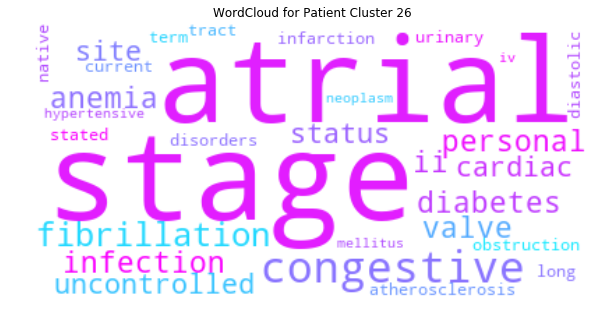

Counter({'stage': 1893, 'atrial': 1721, 'congestive': 1629, 'fibrillation': 1572, 'diabetes': 1124, 'ii': 1082, 'infection': 1078, 'anemia': 1066, 'personal': 1053, 'valve': 1047, 'uncontrolled': 1046, 'site': 998, 'status': 998, 'cardiac': 973, 'atherosclerosis': 972, 'stated': 946, 'urinary': 917, 'current': 898, 'long': 890, 'term': 889, 'disorders': 881, 'infarction': 879, 'obstruction': 867, 'native': 860, 'diastolic': 844, 'tract': 833, 'hypertensive': 802, 'iv': 795, 'mellitus': 787, 'neoplasm': 775, 'anticoagulants': 762, 'malignant': 754, 'systolic': 739, 'respiratory': 726, 'hemorrhage': 704, 'pneumonia': 681, 'artery': 621, 'pulmonary': 620, 'abnormal': 615, 'causing': 596, 'conditions': 587, 'hyperlipidemia': 576, 'bypass': 547, 'effects': 545, 'graft': 507, 'acquired': 489, 'procedure': 487, 'organism': 473, 'aortocoronary': 465, 'mitral': 445, 'ulcer': 442, 'cerebral': 434, 'obstructive': 431, 'situ': 418, 'therapeutic': 409, 'adverse': 405, 'care': 403, 'reaction': 401, 

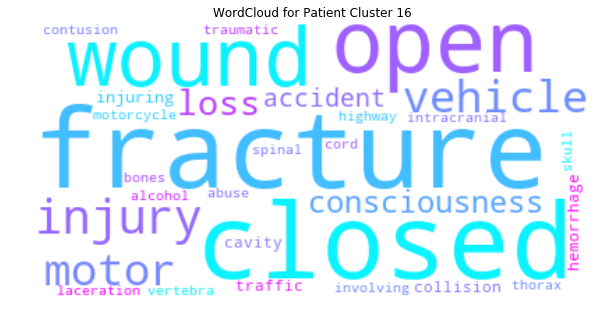

Counter({'fracture': 3661, 'closed': 3453, 'open': 3200, 'wound': 2826, 'injury': 2089, 'vehicle': 1787, 'motor': 1737, 'loss': 1074, 'consciousness': 1059, 'accident': 1012, 'injuring': 966, 'traffic': 842, 'collision': 818, 'cavity': 779, 'hemorrhage': 769, 'thorax': 692, 'involving': 666, 'intracranial': 628, 'contusion': 611, 'motorcycle': 582, 'abuse': 546, 'cord': 537, 'spinal': 528, 'vertebra': 518, 'traumatic': 517, 'skull': 496, 'bones': 488, 'alcohol': 465, 'laceration': 461, 'highway': 452, 'subarachnoid': 445, 'driver': 439, 'fall': 425, 'subdural': 422, 'following': 372, 'base': 369, 'one': 343, 'ribs': 343, 'lung': 336, 'accidental': 300, 'duration': 293, 'extradural': 292, 'scalp': 278, 'pedestrian': 275, 'level': 271, 'part': 267, 'pneumothorax': 263, 'infection': 252, 'cerebral': 249, 'anemia': 246, 'cervical': 244, 'accidents': 244, 'intra': 234, 'site': 233, 'multiple': 233, 'state': 227, 'except': 226, 'control': 223, 'liver': 222, 'neck': 217, 'less': 203, 'pneumon

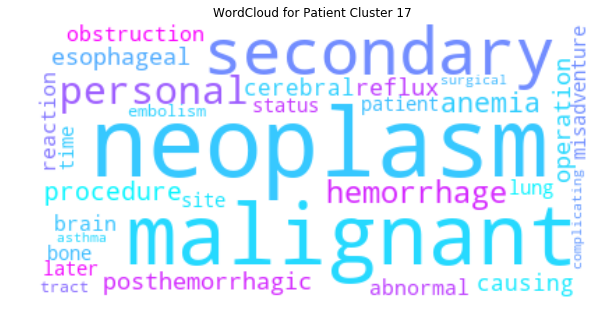

Counter({'neoplasm': 1464, 'malignant': 1430, 'secondary': 803, 'personal': 665, 'hemorrhage': 633, 'anemia': 537, 'procedure': 429, 'esophageal': 368, 'operation': 367, 'posthemorrhagic': 364, 'reflux': 357, 'causing': 316, 'cerebral': 303, 'obstruction': 295, 'abnormal': 293, 'reaction': 286, 'brain': 285, 'bone': 260, 'patient': 251, 'misadventure': 251, 'later': 250, 'time': 250, 'status': 235, 'lung': 231, 'site': 230, 'embolism': 228, 'tract': 213, 'surgical': 212, 'complicating': 206, 'asthma': 206, 'disorders': 203, 'spinal': 203, 'tobacco': 192, 'cord': 186, 'infection': 184, 'acquired': 177, 'current': 177, 'urinary': 174, 'pulmonary': 174, 'long': 168, 'edema': 166, 'term': 165, 'effects': 164, 'breast': 162, 'infarction': 162, 'liver': 157, 'thrombosis': 157, 'cardiac': 156, 'ulcer': 143, 'venous': 143, 'therapeutic': 142, 'lower': 140, 'migraine': 140, 'hypotension': 139, 'adverse': 135, 'benign': 132, 'fracture': 129, 'sites': 124, 'pain': 123, 'bronchus': 121, 'diabetes'

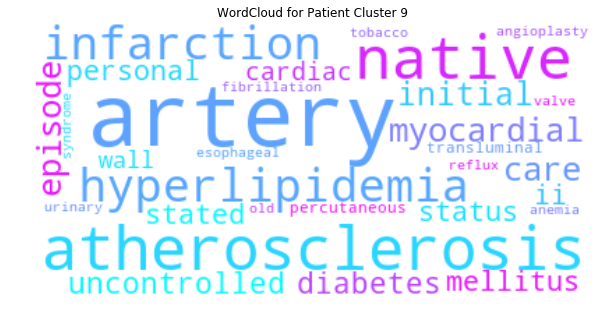

Counter({'artery': 1602, 'atherosclerosis': 1523, 'native': 1473, 'hyperlipidemia': 980, 'infarction': 979, 'myocardial': 587, 'care': 579, 'episode': 571, 'initial': 540, 'diabetes': 424, 'uncontrolled': 411, 'ii': 391, 'stated': 388, 'status': 388, 'personal': 387, 'mellitus': 380, 'cardiac': 318, 'wall': 290, 'percutaneous': 290, 'transluminal': 290, 'angioplasty': 290, 'tobacco': 282, 'esophageal': 279, 'reflux': 278, 'urinary': 275, 'syndrome': 270, 'old': 269, 'fibrillation': 255, 'valve': 250, 'anemia': 249, 'subendocardial': 247, 'atrial': 247, 'angina': 237, 'pectoris': 237, 'intermediate': 236, 'disorders': 224, 'malignant': 217, 'neoplasm': 214, 'obstruction': 209, 'abnormal': 190, 'procedure': 189, 'operation': 175, 'site': 173, 'ischemic': 170, 'tract': 168, 'occlusion': 166, 'reaction': 160, 'cerebral': 158, 'complications': 158, 'patient': 155, 'later': 155, 'misadventure': 155, 'time': 155, 'graft': 149, 'hemorrhage': 147, 'congestive': 147, 'prostate': 146, 'aortic': 1

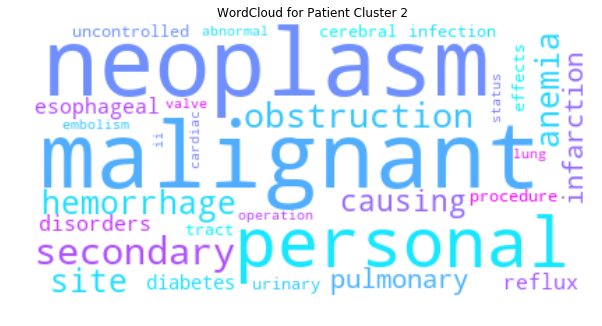

Counter({'neoplasm': 1013, 'malignant': 989, 'personal': 533, 'secondary': 480, 'obstruction': 392, 'hemorrhage': 337, 'anemia': 331, 'site': 317, 'causing': 297, 'pulmonary': 297, 'infarction': 293, 'esophageal': 289, 'reflux': 285, 'disorders': 281, 'diabetes': 262, 'infection': 261, 'urinary': 256, 'uncontrolled': 245, 'procedure': 239, 'tract': 234, 'effects': 228, 'cerebral': 226, 'operation': 212, 'lung': 211, 'valve': 211, 'status': 206, 'abnormal': 204, 'ii': 203, 'embolism': 201, 'cardiac': 200, 'stated': 198, 'pneumonia': 195, 'tobacco': 186, 'congestive': 186, 'adverse': 184, 'therapeutic': 184, 'obstructive': 179, 'reaction': 177, 'mellitus': 176, 'asthma': 170, 'acquired': 165, 'conditions': 164, 'organism': 157, 'patient': 152, 'lower': 150, 'later': 149, 'misadventure': 149, 'time': 149, 'respiratory': 148, 'bronchus': 146, 'pure': 145, 'hypercholesterolemia': 143, 'current': 139, 'surgical': 135, 'depressive': 134, 'hypothyroidism': 134, 'artery': 131, 'bone': 130, 'air

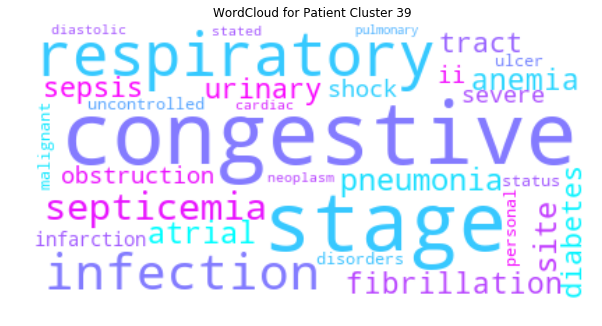

Counter({'congestive': 1181, 'stage': 1046, 'respiratory': 1043, 'infection': 1041, 'septicemia': 819, 'pneumonia': 798, 'atrial': 790, 'site': 786, 'fibrillation': 734, 'anemia': 729, 'urinary': 676, 'tract': 653, 'sepsis': 641, 'diabetes': 614, 'obstruction': 613, 'ii': 600, 'severe': 598, 'shock': 588, 'infarction': 579, 'uncontrolled': 567, 'status': 556, 'disorders': 527, 'malignant': 518, 'personal': 513, 'ulcer': 506, 'neoplasm': 489, 'stated': 464, 'diastolic': 452, 'cardiac': 448, 'pulmonary': 429, 'atherosclerosis': 428, 'organism': 425, 'conditions': 422, 'valve': 410, 'septic': 407, 'hemorrhage': 406, 'care': 405, 'hypertensive': 404, 'native': 386, 'inhalation': 385, 'pneumonitis': 372, 'renal': 371, 'food': 369, 'vomitus': 366, 'mellitus': 349, 'acidosis': 336, 'episode': 330, 'current': 324, 'causing': 320, 'lower': 318, 'pressure': 317, 'long': 316, 'artery': 314, 'term': 314, 'reaction': 309, 'necrosis': 303, 'initial': 302, 'staphylococcus': 294, 'obstructive': 292, '

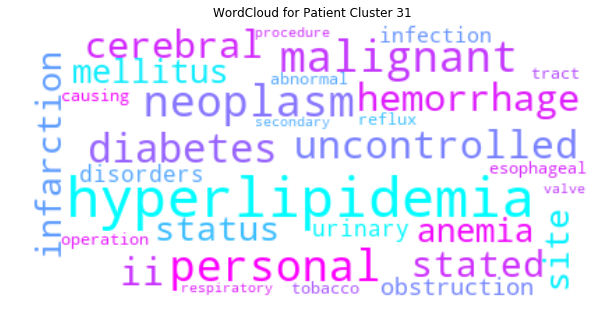

Counter({'hyperlipidemia': 1201, 'neoplasm': 644, 'personal': 639, 'malignant': 629, 'diabetes': 560, 'uncontrolled': 519, 'cerebral': 470, 'hemorrhage': 466, 'ii': 462, 'stated': 425, 'infarction': 397, 'status': 392, 'site': 389, 'mellitus': 369, 'anemia': 363, 'obstruction': 338, 'urinary': 324, 'disorders': 305, 'infection': 305, 'esophageal': 291, 'causing': 282, 'reflux': 282, 'tract': 280, 'abnormal': 265, 'operation': 263, 'tobacco': 257, 'procedure': 253, 'secondary': 252, 'respiratory': 249, 'valve': 246, 'pulmonary': 244, 'conditions': 224, 'effects': 224, 'artery': 223, 'current': 221, 'acquired': 220, 'cardiac': 219, 'reaction': 217, 'obstructive': 215, 'atherosclerosis': 212, 'long': 207, 'term': 203, 'patient': 195, 'later': 194, 'misadventure': 194, 'time': 194, 'lower': 183, 'embolism': 183, 'hypothyroidism': 178, 'native': 177, 'congestive': 176, 'hypotension': 169, 'surgical': 157, 'lung': 155, 'graft': 155, 'adult': 153, 'occlusion': 152, 'aortic': 151, 'pneumonia':

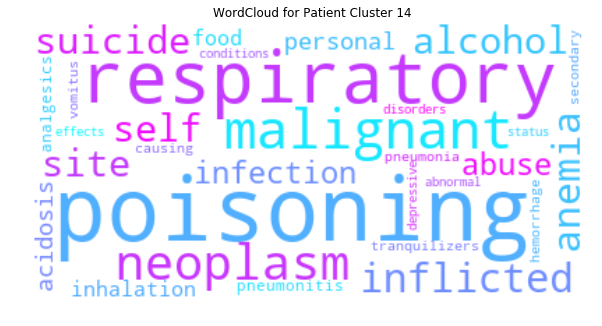

Counter({'poisoning': 1082, 'respiratory': 661, 'malignant': 512, 'neoplasm': 509, 'inflicted': 421, 'anemia': 400, 'self': 383, 'suicide': 382, 'site': 380, 'alcohol': 377, 'infection': 365, 'abuse': 359, 'personal': 337, 'acidosis': 325, 'inhalation': 315, 'food': 306, 'pneumonitis': 302, 'analgesics': 300, 'tranquilizers': 296, 'vomitus': 296, 'hemorrhage': 289, 'pneumonia': 285, 'causing': 278, 'secondary': 277, 'status': 248, 'depressive': 240, 'disorders': 233, 'abnormal': 232, 'effects': 228, 'conditions': 224, 'reaction': 217, 'dependence': 214, 'tract': 210, 'drugs': 209, 'procedure': 207, 'continuous': 205, 'hepatitis': 204, 'liver': 203, 'urinary': 199, 'tobacco': 198, 'accidental': 198, 'pulmonary': 196, 'therapeutic': 189, 'obstruction': 188, 'open': 185, 'adverse': 182, 'drug': 180, 'wound': 174, 'cerebral': 170, 'agents': 166, 'fracture': 166, 'hepatic': 164, 'diabetes': 164, 'embolism': 164, 'necrosis': 164, 'current': 163, 'aromatic': 160, 'patient': 155, 'cardiac': 15

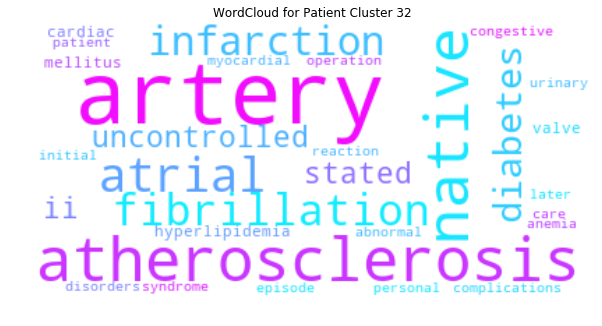

Counter({'artery': 1287, 'atherosclerosis': 1280, 'native': 1221, 'atrial': 726, 'fibrillation': 705, 'infarction': 669, 'diabetes': 575, 'uncontrolled': 560, 'stated': 553, 'ii': 550, 'hyperlipidemia': 535, 'mellitus': 533, 'cardiac': 527, 'valve': 507, 'personal': 446, 'congestive': 419, 'operation': 415, 'disorders': 406, 'complications': 394, 'care': 389, 'episode': 371, 'initial': 346, 'abnormal': 318, 'myocardial': 311, 'syndrome': 286, 'reaction': 280, 'urinary': 277, 'patient': 271, 'anemia': 270, 'later': 269, 'misadventure': 269, 'time': 269, 'intermediate': 263, 'graft': 263, 'bypass': 255, 'aortic': 249, 'causing': 247, 'status': 246, 'mitral': 242, 'procedure': 240, 'obstruction': 239, 'tobacco': 238, 'implant': 228, 'surgical': 225, 'site': 223, 'subendocardial': 216, 'malignant': 210, 'neoplasm': 201, 'esophageal': 196, 'reflux': 194, 'tract': 191, 'artificial': 177, 'iatrogenic': 169, 'natural': 168, 'anastomosis': 167, 'tissues': 166, 'used': 166, 'old': 162, 'infectio

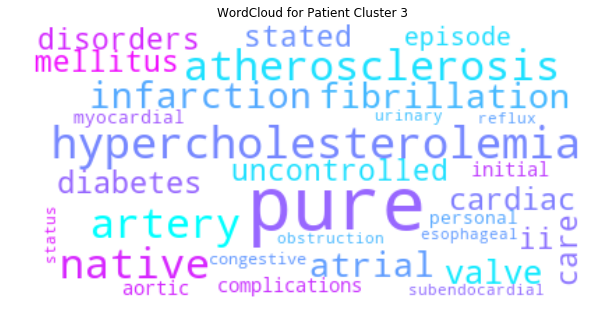

Counter({'pure': 982, 'hypercholesterolemia': 980, 'atherosclerosis': 866, 'artery': 858, 'native': 835, 'infarction': 585, 'atrial': 554, 'fibrillation': 533, 'valve': 499, 'diabetes': 403, 'cardiac': 402, 'uncontrolled': 392, 'disorders': 391, 'ii': 383, 'stated': 383, 'mellitus': 374, 'care': 360, 'episode': 351, 'complications': 338, 'initial': 327, 'aortic': 321, 'myocardial': 271, 'personal': 258, 'congestive': 240, 'status': 212, 'subendocardial': 210, 'esophageal': 192, 'reflux': 188, 'urinary': 181, 'obstruction': 179, 'anemia': 176, 'operation': 169, 'tobacco': 166, 'malignant': 162, 'neoplasm': 162, 'hemorrhage': 158, 'graft': 156, 'site': 152, 'mitral': 152, 'bypass': 152, 'abnormal': 141, 'tract': 135, 'old': 133, 'cerebral': 129, 'procedure': 128, 'angina': 123, 'pectoris': 123, 'causing': 122, 'wall': 120, 'acquired': 120, 'aneurysm': 115, 'hypothyroidism': 113, 'reaction': 112, 'patient': 110, 'implant': 110, 'later': 109, 'misadventure': 109, 'time': 109, 'rupture': 10

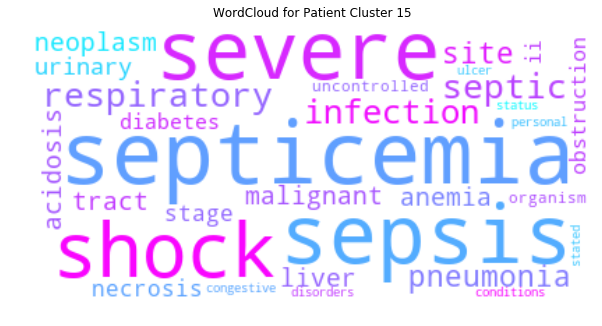

Counter({'septicemia': 1174, 'sepsis': 1037, 'severe': 1004, 'shock': 913, 'respiratory': 841, 'septic': 819, 'infection': 754, 'pneumonia': 625, 'site': 617, 'malignant': 545, 'neoplasm': 518, 'anemia': 496, 'tract': 482, 'liver': 478, 'acidosis': 459, 'urinary': 457, 'necrosis': 428, 'stage': 411, 'diabetes': 385, 'ii': 373, 'obstruction': 371, 'uncontrolled': 364, 'organism': 352, 'congestive': 346, 'personal': 345, 'ulcer': 330, 'stated': 327, 'conditions': 314, 'disorders': 303, 'status': 300, 'mellitus': 282, 'inhalation': 262, 'pneumonitis': 259, 'food': 259, 'hemorrhage': 258, 'vomitus': 258, 'lesion': 256, 'secondary': 252, 'infarction': 231, 'atrial': 231, 'pressure': 228, 'tubular': 227, 'syndrome': 226, 'pulmonary': 219, 'thrombocytopenia': 218, 'acquired': 216, 'subacute': 208, 'staphylococcus': 205, 'fibrillation': 203, 'alcohol': 199, 'reaction': 193, 'care': 192, 'methicillin': 192, 'aureus': 192, 'cardiac': 189, 'lower': 185, 'effects': 185, 'hepatic': 182, 'hepatitis'

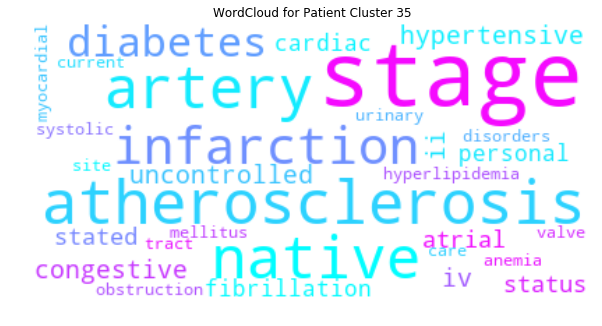

Counter({'stage': 1773, 'atherosclerosis': 1315, 'artery': 1178, 'native': 1171, 'infarction': 921, 'diabetes': 827, 'hypertensive': 789, 'iv': 785, 'congestive': 757, 'ii': 756, 'uncontrolled': 751, 'atrial': 696, 'status': 695, 'stated': 691, 'fibrillation': 646, 'cardiac': 609, 'personal': 601, 'hyperlipidemia': 589, 'anemia': 563, 'valve': 544, 'mellitus': 531, 'urinary': 507, 'obstruction': 475, 'disorders': 469, 'site': 439, 'care': 430, 'systolic': 430, 'myocardial': 411, 'current': 402, 'tract': 395, 'long': 394, 'term': 393, 'hemorrhage': 382, 'episode': 380, 'bypass': 374, 'abnormal': 368, 'graft': 365, 'neoplasm': 364, 'malignant': 362, 'procedure': 360, 'infection': 358, 'operation': 354, 'causing': 348, 'initial': 340, 'diastolic': 332, 'reaction': 308, 'old': 303, 'cerebral': 295, 'percutaneous': 290, 'transluminal': 290, 'angioplasty': 290, 'patient': 288, 'later': 285, 'misadventure': 285, 'time': 285, 'complications': 280, 'pulmonary': 275, 'subendocardial': 264, 'esop

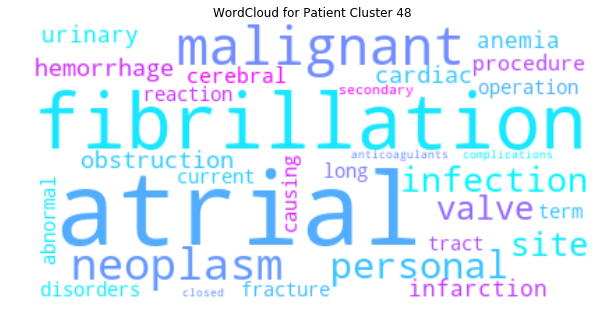

Counter({'atrial': 1121, 'fibrillation': 1014, 'malignant': 661, 'neoplasm': 651, 'personal': 464, 'infection': 421, 'valve': 399, 'site': 386, 'hemorrhage': 382, 'cardiac': 371, 'obstruction': 357, 'anemia': 328, 'infarction': 320, 'urinary': 318, 'procedure': 299, 'cerebral': 289, 'operation': 282, 'tract': 281, 'abnormal': 275, 'current': 273, 'fracture': 272, 'causing': 269, 'disorders': 262, 'long': 259, 'term': 257, 'reaction': 257, 'secondary': 255, 'complications': 248, 'closed': 247, 'anticoagulants': 241, 'diabetes': 234, 'pneumonia': 216, 'patient': 213, 'conditions': 212, 'pulmonary': 207, 'later': 207, 'misadventure': 207, 'time': 207, 'stage': 206, 'uncontrolled': 204, 'ii': 195, 'insufficiency': 194, 'open': 194, 'wound': 191, 'stated': 190, 'artery': 181, 'effects': 180, 'lung': 180, 'iatrogenic': 180, 'surgical': 177, 'aortic': 173, 'status': 166, 'embolism': 161, 'hypotension': 159, 'mitral': 157, 'acquired': 155, 'injury': 155, 'vascular': 149, 'fall': 148, 'respirat

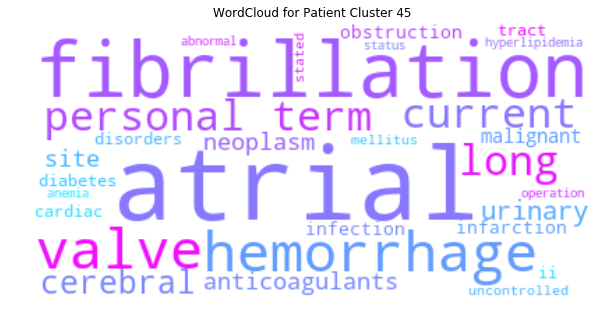

Counter({'atrial': 1194, 'fibrillation': 1081, 'valve': 477, 'hemorrhage': 469, 'personal': 452, 'current': 450, 'long': 436, 'term': 433, 'cerebral': 423, 'urinary': 421, 'anticoagulants': 418, 'site': 412, 'neoplasm': 399, 'malignant': 397, 'infection': 352, 'infarction': 347, 'obstruction': 338, 'disorders': 334, 'tract': 333, 'diabetes': 322, 'cardiac': 321, 'ii': 321, 'uncontrolled': 314, 'stated': 304, 'mellitus': 301, 'hyperlipidemia': 298, 'anemia': 295, 'operation': 279, 'abnormal': 268, 'status': 249, 'causing': 247, 'procedure': 220, 'reaction': 220, 'congestive': 219, 'aortic': 208, 'mitral': 195, 'patient': 194, 'time': 194, 'later': 193, 'misadventure': 193, 'conditions': 189, 'pulmonary': 188, 'effects': 187, 'embolism': 181, 'acquired': 171, 'esophageal': 168, 'reflux': 166, 'surgical': 166, 'complications': 165, 'wound': 165, 'open': 163, 'lower': 158, 'respiratory': 157, 'fall': 152, 'artery': 151, 'pneumonia': 137, 'hypothyroidism': 136, 'obstructive': 135, 'insuffic

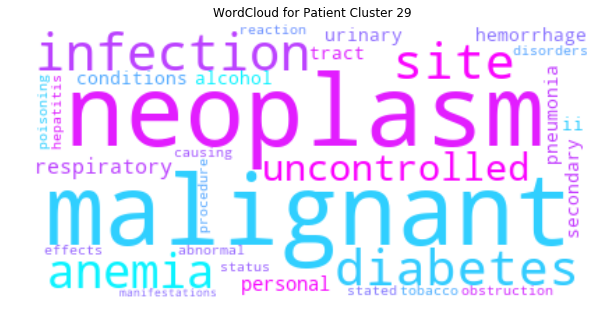

Counter({'neoplasm': 556, 'malignant': 540, 'infection': 514, 'diabetes': 486, 'site': 474, 'anemia': 422, 'uncontrolled': 416, 'respiratory': 411, 'personal': 381, 'urinary': 320, 'tract': 307, 'hemorrhage': 301, 'pneumonia': 296, 'conditions': 284, 'alcohol': 279, 'ii': 279, 'secondary': 273, 'obstruction': 270, 'stated': 256, 'status': 234, 'causing': 221, 'disorders': 221, 'abnormal': 218, 'poisoning': 214, 'procedure': 212, 'reaction': 206, 'effects': 205, 'hepatitis': 199, 'tobacco': 199, 'manifestations': 189, 'cerebral': 187, 'septicemia': 186, 'infarction': 180, 'organism': 177, 'pulmonary': 177, 'inhalation': 175, 'current': 174, 'depressive': 172, 'food': 172, 'pneumonitis': 170, 'vomitus': 169, 'acidosis': 162, 'dependence': 161, 'operation': 161, 'long': 158, 'term': 154, 'patient': 153, 'ulcer': 151, 'later': 150, 'misadventure': 150, 'time': 150, 'mellitus': 150, 'obstructive': 150, 'juvenile': 149, 'sepsis': 143, 'acquired': 143, 'therapeutic': 141, 'adverse': 136, 'liv

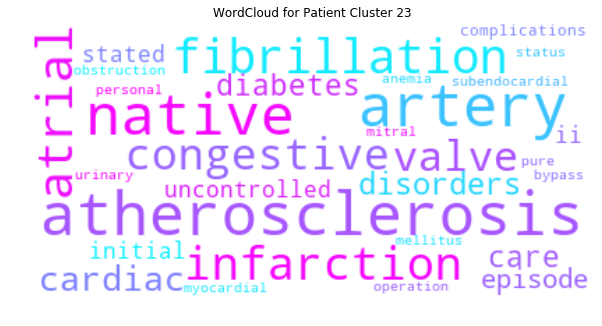

Counter({'atherosclerosis': 1076, 'artery': 1041, 'native': 1000, 'atrial': 712, 'fibrillation': 675, 'infarction': 636, 'congestive': 552, 'valve': 538, 'cardiac': 478, 'disorders': 436, 'care': 392, 'diabetes': 383, 'episode': 383, 'uncontrolled': 363, 'initial': 356, 'stated': 342, 'ii': 336, 'complications': 330, 'mellitus': 299, 'personal': 272, 'mitral': 270, 'operation': 263, 'myocardial': 256, 'subendocardial': 242, 'anemia': 237, 'urinary': 232, 'obstruction': 231, 'status': 228, 'pure': 222, 'bypass': 222, 'hypercholesterolemia': 221, 'site': 217, 'aortic': 217, 'abnormal': 215, 'graft': 208, 'infection': 197, 'procedure': 196, 'malignant': 191, 'tract': 189, 'reaction': 188, 'causing': 181, 'neoplasm': 178, 'hemorrhage': 176, 'patient': 174, 'later': 173, 'misadventure': 173, 'time': 173, 'stage': 166, 'implant': 150, 'surgical': 148, 'pulmonary': 147, 'hyperlipidemia': 146, 'esophageal': 137, 'airway': 136, 'reflux': 133, 'syndrome': 131, 'systolic': 128, 'tobacco': 125, 'o

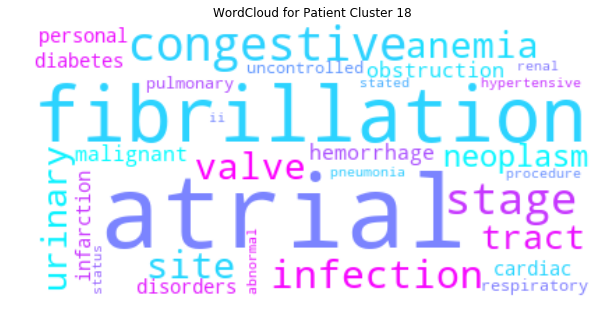

Counter({'atrial': 788, 'fibrillation': 756, 'congestive': 727, 'stage': 649, 'infection': 493, 'site': 457, 'anemia': 434, 'valve': 419, 'urinary': 397, 'tract': 389, 'neoplasm': 366, 'hemorrhage': 365, 'malignant': 359, 'obstruction': 353, 'infarction': 324, 'cardiac': 309, 'diabetes': 303, 'personal': 303, 'disorders': 298, 'respiratory': 285, 'pulmonary': 284, 'uncontrolled': 271, 'hypertensive': 270, 'status': 270, 'ii': 269, 'pneumonia': 267, 'procedure': 251, 'abnormal': 246, 'stated': 241, 'renal': 238, 'current': 236, 'long': 229, 'term': 227, 'diastolic': 225, 'reaction': 217, 'conditions': 217, 'causing': 203, 'atherosclerosis': 200, 'anticoagulants': 197, 'care': 194, 'ulcer': 188, 'complications': 176, 'graft': 172, 'native': 167, 'acquired': 166, 'iv': 165, 'effects': 164, 'cerebral': 163, 'systolic': 162, 'operation': 161, 'mitral': 159, 'organism': 157, 'primary': 156, 'patient': 156, 'posthemorrhagic': 155, 'later': 152, 'misadventure': 152, 'time': 152, 'insufficiency

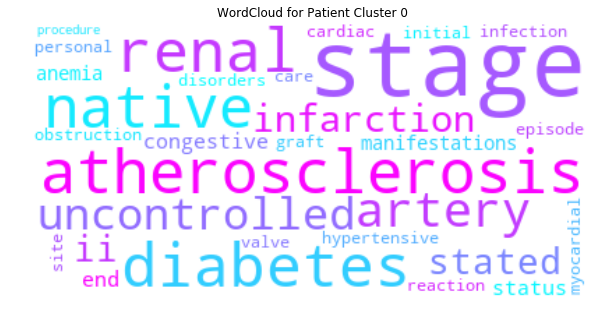

Counter({'stage': 1279, 'atherosclerosis': 1023, 'diabetes': 976, 'renal': 965, 'native': 940, 'artery': 921, 'uncontrolled': 830, 'infarction': 736, 'ii': 700, 'stated': 691, 'congestive': 617, 'status': 612, 'end': 589, 'anemia': 541, 'manifestations': 527, 'hypertensive': 470, 'cardiac': 436, 'care': 412, 'personal': 400, 'episode': 387, 'infection': 375, 'site': 370, 'disorders': 350, 'initial': 337, 'myocardial': 331, 'valve': 327, 'obstruction': 311, 'graft': 306, 'reaction': 301, 'procedure': 299, 'hemorrhage': 299, 'complications': 295, 'urinary': 292, 'current': 291, 'abnormal': 291, 'malignant': 290, 'long': 281, 'term': 280, 'neoplasm': 279, 'causing': 266, 'systolic': 265, 'mellitus': 264, 'operation': 260, 'subendocardial': 256, 'pulmonary': 247, 'patient': 245, 'later': 244, 'misadventure': 244, 'time': 244, 'hyperlipidemia': 240, 'diastolic': 239, 'tract': 237, 'implant': 229, 'bypass': 226, 'fibrillation': 221, 'ulcer': 217, 'atrial': 216, 'old': 214, 'pneumonia': 203, 

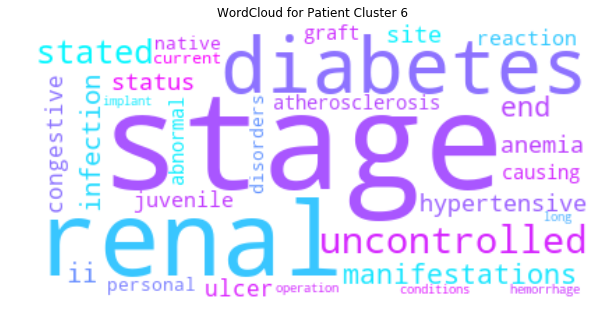

Counter({'stage': 1928, 'renal': 1663, 'diabetes': 1641, 'uncontrolled': 1398, 'stated': 1057, 'manifestations': 1014, 'end': 970, 'infection': 898, 'ii': 884, 'anemia': 728, 'hypertensive': 692, 'status': 665, 'site': 636, 'congestive': 590, 'ulcer': 572, 'juvenile': 553, 'reaction': 551, 'atherosclerosis': 486, 'causing': 463, 'abnormal': 457, 'graft': 456, 'personal': 454, 'disorders': 451, 'native': 435, 'current': 427, 'operation': 421, 'implant': 414, 'conditions': 413, 'hemorrhage': 413, 'long': 411, 'term': 409, 'procedure': 409, 'pneumonia': 402, 'infarction': 400, 'complications': 399, 'vascular': 375, 'patient': 371, 'urinary': 369, 'time': 367, 'later': 366, 'misadventure': 366, 'tract': 361, 'septicemia': 359, 'device': 359, 'respiratory': 357, 'neurological': 346, 'malignant': 343, 'dialysis': 339, 'obstruction': 339, 'cardiac': 333, 'pulmonary': 315, 'effects': 315, 'diastolic': 314, 'neoplasm': 312, 'artery': 304, 'pressure': 304, 'atrial': 290, 'lower': 289, 'sepsis': 

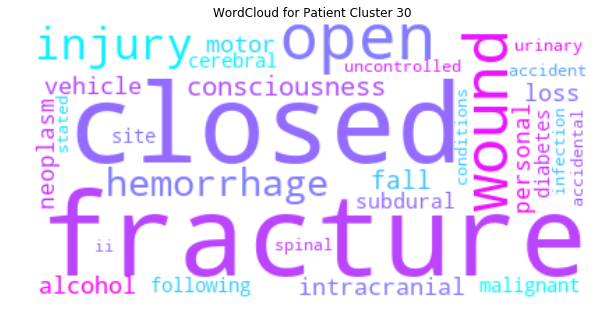

Counter({'fracture': 759, 'closed': 740, 'open': 584, 'wound': 545, 'injury': 473, 'hemorrhage': 405, 'consciousness': 357, 'fall': 307, 'loss': 286, 'intracranial': 277, 'alcohol': 267, 'vehicle': 267, 'motor': 264, 'neoplasm': 228, 'personal': 224, 'subdural': 207, 'following': 204, 'malignant': 204, 'cerebral': 197, 'diabetes': 190, 'site': 188, 'uncontrolled': 172, 'infection': 171, 'accidental': 162, 'accident': 158, 'urinary': 156, 'ii': 154, 'stated': 154, 'spinal': 149, 'conditions': 148, 'cord': 146, 'injuring': 140, 'vertebra': 139, 'disorders': 134, 'tract': 134, 'obstruction': 134, 'subarachnoid': 133, 'anemia': 129, 'mellitus': 127, 'acquired': 127, 'infarction': 120, 'contusion': 120, 'traffic': 118, 'collision': 114, 'abuse': 110, 'state': 109, 'status': 109, 'withdrawal': 107, 'continuous': 105, 'convulsions': 102, 'skull': 101, 'involving': 99, 'thorax': 97, 'stairs': 94, 'steps': 94, 'dependence': 92, 'hypothyroidism': 91, 'pneumonia': 91, 'ribs': 90, 'procedure': 90,

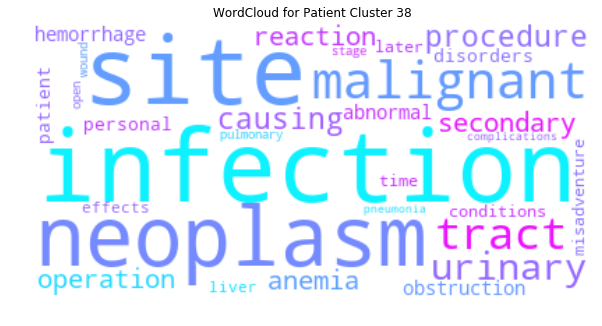

Counter({'infection': 584, 'site': 526, 'neoplasm': 514, 'malignant': 508, 'tract': 360, 'urinary': 344, 'procedure': 272, 'causing': 266, 'operation': 260, 'anemia': 255, 'secondary': 255, 'reaction': 250, 'hemorrhage': 250, 'obstruction': 245, 'abnormal': 232, 'personal': 206, 'disorders': 199, 'patient': 197, 'conditions': 196, 'later': 192, 'misadventure': 192, 'time': 192, 'liver': 172, 'effects': 166, 'pulmonary': 164, 'wound': 163, 'open': 162, 'stage': 161, 'complications': 161, 'pneumonia': 158, 'hepatitis': 151, 'surgical': 151, 'injury': 146, 'fracture': 139, 'ulcer': 139, 'implant': 137, 'postoperative': 136, 'status': 135, 'alcohol': 134, 'embolism': 131, 'therapeutic': 129, 'adverse': 128, 'vascular': 126, 'device': 123, 'abscess': 123, 'graft': 120, 'intestine': 120, 'diabetes': 119, 'hepatic': 119, 'effusion': 111, 'closed': 111, 'infarction': 109, 'renal': 107, 'uncontrolled': 105, 'coma': 105, 'sites': 105, 'pleural': 104, 'thrombocytopenia': 103, 'staphylococcus': 97

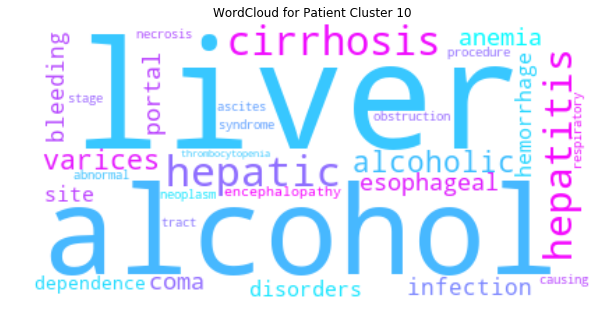

Counter({'liver': 1202, 'alcohol': 752, 'hepatic': 746, 'cirrhosis': 712, 'hepatitis': 681, 'alcoholic': 571, 'varices': 497, 'esophageal': 482, 'anemia': 481, 'portal': 480, 'coma': 479, 'infection': 441, 'bleeding': 419, 'hemorrhage': 379, 'site': 368, 'disorders': 359, 'dependence': 355, 'encephalopathy': 335, 'syndrome': 301, 'stage': 298, 'necrosis': 294, 'procedure': 291, 'respiratory': 287, 'obstruction': 285, 'tract': 281, 'neoplasm': 271, 'abnormal': 270, 'ascites': 270, 'causing': 266, 'thrombocytopenia': 264, 'coagulation': 263, 'diabetes': 258, 'deficiency': 252, 'personal': 250, 'malignant': 245, 'septicemia': 242, 'uncontrolled': 240, 'operation': 240, 'status': 237, 'ii': 235, 'reaction': 232, 'hyposmolality': 227, 'hyponatremia': 227, 'sepsis': 214, 'urinary': 205, 'continuous': 204, 'patient': 203, 'stated': 203, 'later': 200, 'misadventure': 200, 'time': 200, 'conditions': 198, 'pneumonia': 196, 'hepatorenal': 196, 'acidosis': 191, 'viral': 189, 'posthemorrhagic': 184

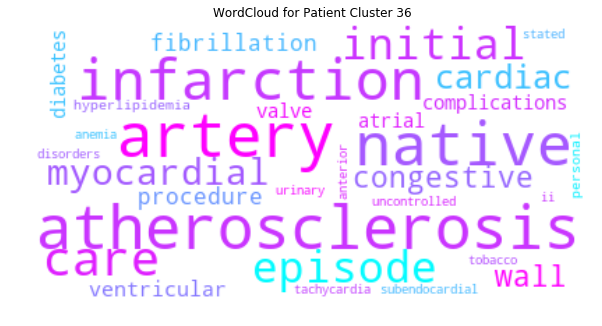

Counter({'atherosclerosis': 836, 'artery': 833, 'native': 777, 'infarction': 719, 'care': 553, 'episode': 545, 'initial': 530, 'myocardial': 495, 'cardiac': 401, 'congestive': 388, 'wall': 377, 'fibrillation': 236, 'procedure': 222, 'ventricular': 210, 'valve': 195, 'atrial': 187, 'diabetes': 184, 'complications': 183, 'hyperlipidemia': 183, 'personal': 181, 'uncontrolled': 162, 'tobacco': 155, 'disorders': 154, 'stated': 153, 'anemia': 153, 'anterior': 152, 'tachycardia': 147, 'subendocardial': 147, 'ii': 146, 'urinary': 145, 'paroxysmal': 144, 'site': 144, 'status': 144, 'abnormal': 137, 'reaction': 134, 'hemorrhage': 134, 'tract': 134, 'shock': 133, 'graft': 133, 'inferior': 131, 'systolic': 129, 'obstruction': 129, 'mellitus': 128, 'cardiogenic': 125, 'mitral': 123, 'infection': 122, 'patient': 121, 'later': 121, 'misadventure': 121, 'time': 121, 'malignant': 112, 'pure': 110, 'neoplasm': 110, 'hypercholesterolemia': 108, 'hypotension': 105, 'ischemic': 105, 'pulmonary': 104, 'impl

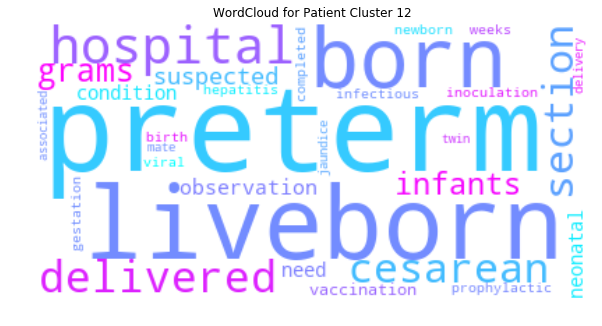

Counter({'preterm': 1021, 'liveborn': 709, 'born': 706, 'hospital': 706, 'delivered': 705, 'cesarean': 705, 'section': 705, 'grams': 676, 'infants': 646, 'suspected': 583, 'observation': 582, 'condition': 579, 'neonatal': 571, 'need': 566, 'vaccination': 566, 'prophylactic': 565, 'inoculation': 565, 'hepatitis': 563, 'completed': 563, 'weeks': 563, 'gestation': 563, 'viral': 561, 'infectious': 552, 'newborn': 541, 'birth': 527, 'jaundice': 406, 'delivery': 397, 'twin': 386, 'mate': 386, 'associated': 386, 'single': 303, 'respiratory': 275, 'routine': 191, 'ritual': 183, 'circumcision': 183, 'syndrome': 177, 'apnea': 157, 'distress': 148, 'transitory': 144, 'tachypnea': 140, 'primary': 138, 'problems': 120, 'bradycardia': 77, 'fetal': 66, 'fetus': 64, 'conditions': 58, 'hypoglycemia': 52, 'affecting': 42, 'dates': 40, 'infection': 37, 'congenital': 32, 'cardiac': 31, 'atherosclerosis': 31, 'artery': 31, 'malnutrition': 30, 'native': 30, 'light': 29, 'diabetes': 28, 'infant': 27, 'hemorr

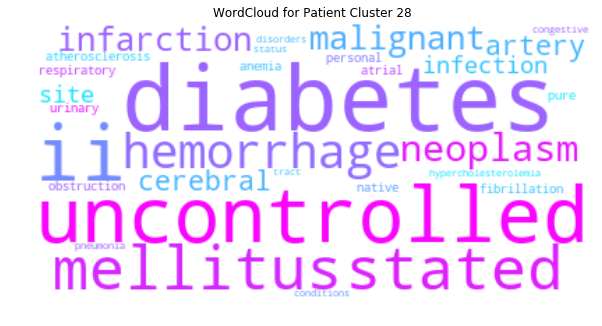

Counter({'diabetes': 404, 'uncontrolled': 400, 'ii': 399, 'stated': 392, 'mellitus': 385, 'hemorrhage': 260, 'neoplasm': 254, 'malignant': 247, 'infarction': 244, 'artery': 238, 'cerebral': 236, 'infection': 216, 'site': 208, 'atherosclerosis': 204, 'personal': 193, 'native': 188, 'atrial': 173, 'respiratory': 168, 'fibrillation': 168, 'urinary': 165, 'obstruction': 156, 'anemia': 155, 'pure': 153, 'hypercholesterolemia': 151, 'tract': 150, 'disorders': 144, 'status': 140, 'pneumonia': 134, 'conditions': 124, 'congestive': 121, 'acquired': 120, 'pulmonary': 117, 'cardiac': 112, 'valve': 108, 'care': 104, 'obstructive': 101, 'abnormal': 101, 'procedure': 101, 'hypothyroidism': 99, 'esophageal': 95, 'embolism': 94, 'operation': 94, 'reflux': 91, 'reaction': 90, 'organism': 86, 'current': 86, 'secondary': 86, 'causing': 83, 'wound': 81, 'open': 78, 'long': 77, 'term': 77, 'lung': 75, 'patient': 75, 'later': 75, 'misadventure': 75, 'time': 75, 'airway': 74, 'intracerebral': 72, 'tobacco': 

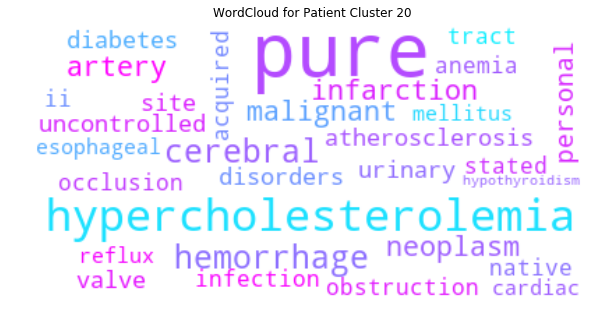

Counter({'pure': 634, 'hypercholesterolemia': 631, 'cerebral': 293, 'hemorrhage': 287, 'infarction': 228, 'artery': 225, 'neoplasm': 219, 'malignant': 217, 'personal': 179, 'disorders': 156, 'site': 155, 'urinary': 154, 'valve': 148, 'atherosclerosis': 144, 'diabetes': 141, 'uncontrolled': 135, 'native': 125, 'ii': 124, 'obstruction': 122, 'stated': 120, 'tract': 120, 'infection': 119, 'occlusion': 115, 'anemia': 114, 'acquired': 110, 'esophageal': 109, 'mellitus': 106, 'reflux': 104, 'cardiac': 104, 'hypothyroidism': 103, 'status': 100, 'mitral': 94, 'open': 93, 'operation': 93, 'atrial': 91, 'procedure': 91, 'abnormal': 91, 'wound': 87, 'causing': 87, 'loss': 86, 'graft': 83, 'fall': 83, 'consciousness': 82, 'reaction': 79, 'intracerebral': 78, 'tobacco': 75, 'intracranial': 75, 'secondary': 75, 'fibrillation': 74, 'injury': 74, 'patient': 72, 'later': 72, 'misadventure': 72, 'time': 72, 'bypass': 70, 'subdural': 70, 'complications': 66, 'aneurysm': 66, 'stenosis': 65, 'following': 6

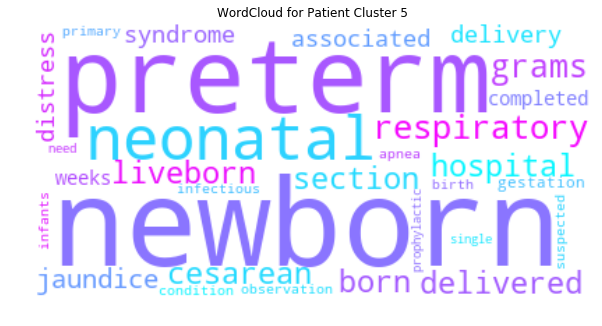

Counter({'newborn': 1332, 'preterm': 960, 'neonatal': 956, 'respiratory': 731, 'grams': 663, 'liveborn': 633, 'born': 629, 'hospital': 629, 'cesarean': 626, 'section': 626, 'delivered': 625, 'jaundice': 577, 'delivery': 573, 'syndrome': 567, 'associated': 564, 'distress': 546, 'completed': 539, 'weeks': 539, 'gestation': 539, 'apnea': 424, 'infants': 400, 'primary': 375, 'suspected': 370, 'birth': 369, 'observation': 361, 'condition': 360, 'infectious': 342, 'single': 300, 'need': 285, 'prophylactic': 284, 'vaccination': 284, 'inoculation': 284, 'anemia': 283, 'perinatal': 270, 'prematurity': 258, 'viral': 256, 'hepatitis': 255, 'twin': 250, 'mate': 250, 'period': 247, 'patent': 221, 'ductus': 221, 'arteriosus': 221, 'bradycardia': 215, 'conditions': 201, 'extreme': 199, 'immaturity': 199, 'hemorrhage': 180, 'septicemia': 158, 'sepsis': 140, 'arising': 130, 'congenital': 125, 'retrolental': 115, 'fibroplasia': 115, 'originating': 115, 'intraventricular': 109, 'grade': 109, 'obstruction

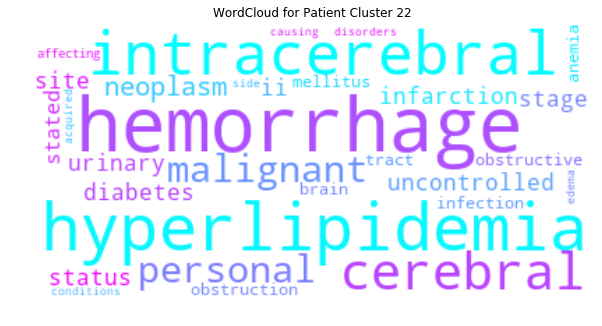

Counter({'hemorrhage': 378, 'hyperlipidemia': 315, 'intracerebral': 259, 'cerebral': 259, 'malignant': 225, 'personal': 223, 'neoplasm': 218, 'diabetes': 160, 'infarction': 159, 'stage': 152, 'status': 148, 'uncontrolled': 148, 'site': 147, 'ii': 141, 'urinary': 137, 'stated': 123, 'obstruction': 122, 'mellitus': 120, 'tract': 114, 'brain': 114, 'obstructive': 113, 'anemia': 113, 'infection': 111, 'affecting': 109, 'conditions': 108, 'causing': 103, 'edema': 103, 'disorders': 102, 'acquired': 100, 'side': 99, 'hemiplegia': 98, 'procedure': 95, 'effects': 95, 'abnormal': 93, 'liveborn': 93, 'born': 93, 'hospital': 93, 'delivered': 93, 'cesarean': 93, 'section': 93, 'single': 90, 'esophageal': 88, 'reflux': 88, 'embolism': 88, 'compression': 87, 'artery': 86, 'atrial': 84, 'operation': 84, 'reaction': 80, 'atherosclerosis': 79, 'current': 79, 'cardiac': 76, 'benign': 75, 'patient': 75, 'pulmonary': 74, 'later': 73, 'misadventure': 73, 'time': 73, 'secondary': 73, 'fibrillation': 72, 'sus

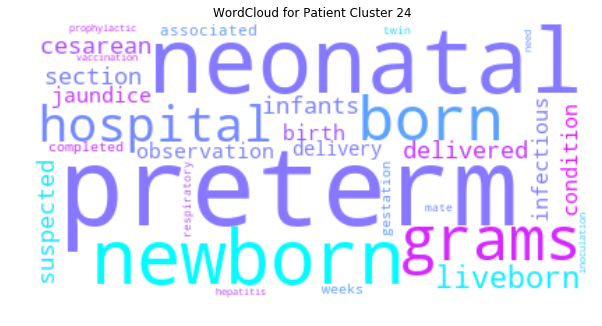

Counter({'preterm': 1033, 'neonatal': 701, 'newborn': 638, 'grams': 606, 'born': 596, 'hospital': 596, 'liveborn': 593, 'delivered': 592, 'cesarean': 592, 'section': 592, 'infants': 558, 'suspected': 534, 'observation': 533, 'condition': 532, 'infectious': 522, 'birth': 504, 'jaundice': 488, 'delivery': 482, 'associated': 480, 'completed': 475, 'weeks': 475, 'gestation': 475, 'respiratory': 325, 'twin': 320, 'mate': 320, 'hepatitis': 279, 'need': 278, 'prophylactic': 278, 'vaccination': 278, 'inoculation': 278, 'viral': 277, 'apnea': 273, 'primary': 244, 'syndrome': 236, 'distress': 220, 'single': 176, 'bradycardia': 149, 'multiple': 110, 'three': 102, 'mates': 101, 'conditions': 97, 'problems': 82, 'routine': 80, 'ritual': 80, 'circumcision': 80, 'fetal': 70, 'perinatal': 67, 'fetus': 63, 'period': 60, 'originating': 54, 'anemia': 49, 'transitory': 49, 'affecting': 44, 'tachypnea': 42, 'congenital': 38, 'prematurity': 36, 'dates': 36, 'light': 33, 'malnutrition': 33, 'patent': 32, 'du

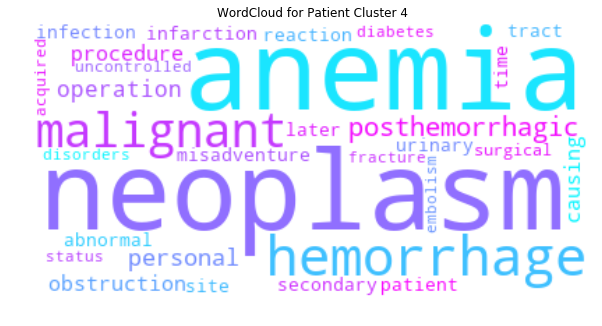

Counter({'anemia': 494, 'neoplasm': 477, 'hemorrhage': 452, 'malignant': 447, 'posthemorrhagic': 388, 'personal': 317, 'operation': 284, 'obstruction': 257, 'causing': 252, 'procedure': 244, 'secondary': 227, 'infection': 220, 'abnormal': 218, 'site': 202, 'tract': 193, 'reaction': 190, 'urinary': 179, 'patient': 174, 'later': 171, 'misadventure': 171, 'time': 171, 'infarction': 165, 'surgical': 165, 'diabetes': 151, 'status': 146, 'disorders': 145, 'uncontrolled': 143, 'acquired': 139, 'fracture': 139, 'embolism': 139, 'ii': 138, 'effects': 138, 'stated': 135, 'conditions': 130, 'artery': 128, 'atherosclerosis': 126, 'ulcer': 125, 'colon': 120, 'mellitus': 118, 'pulmonary': 115, 'cerebral': 113, 'hypotension': 112, 'native': 112, 'esophageal': 111, 'therapeutic': 110, 'hyperlipidemia': 109, 'adverse': 109, 'complicating': 109, 'current': 108, 'long': 106, 'term': 105, 'lower': 104, 'postoperative': 104, 'closed': 103, 'pure': 102, 'hypercholesterolemia': 102, 'reflux': 101, 'iatrogeni

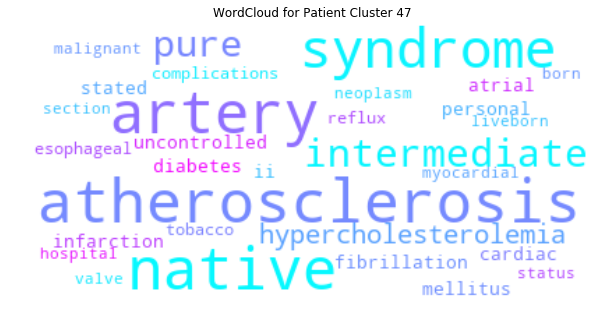

Counter({'atherosclerosis': 531, 'artery': 507, 'native': 505, 'syndrome': 430, 'intermediate': 404, 'pure': 371, 'hypercholesterolemia': 370, 'personal': 150, 'diabetes': 150, 'uncontrolled': 148, 'cardiac': 148, 'stated': 144, 'mellitus': 142, 'atrial': 135, 'infarction': 134, 'ii': 132, 'fibrillation': 128, 'esophageal': 106, 'reflux': 106, 'complications': 103, 'tobacco': 101, 'myocardial': 87, 'valve': 81, 'malignant': 81, 'neoplasm': 78, 'status': 74, 'section': 73, 'liveborn': 72, 'born': 72, 'hospital': 72, 'delivered': 72, 'cesarean': 72, 'single': 71, 'obstruction': 66, 'procedure': 63, 'graft': 62, 'old': 62, 'anemia': 60, 'site': 60, 'disorders': 58, 'urinary': 54, 'care': 53, 'newborn': 47, 'pulmonary': 46, 'infection': 45, 'abnormal': 45, 'episode': 43, 'congestive': 43, 'mitral': 43, 'ischemic': 43, 'family': 42, 'hemorrhage': 42, 'tract': 41, 'operation': 41, 'implant': 40, 'causing': 38, 'bypass': 38, 'respiratory': 38, 'percutaneous': 38, 'transluminal': 38, 'angiopla

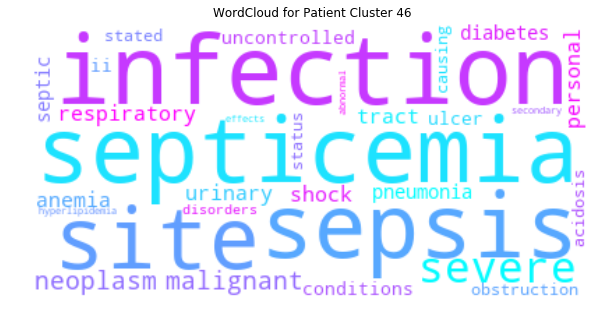

Counter({'infection': 411, 'septicemia': 377, 'sepsis': 361, 'site': 344, 'severe': 331, 'malignant': 314, 'neoplasm': 312, 'respiratory': 294, 'anemia': 279, 'urinary': 265, 'shock': 256, 'personal': 255, 'tract': 243, 'pneumonia': 233, 'diabetes': 231, 'septic': 221, 'uncontrolled': 212, 'ii': 209, 'conditions': 194, 'ulcer': 186, 'obstruction': 179, 'status': 175, 'stated': 171, 'acidosis': 164, 'causing': 162, 'disorders': 156, 'hyperlipidemia': 155, 'abnormal': 154, 'effects': 151, 'secondary': 148, 'mellitus': 148, 'hemorrhage': 144, 'reaction': 144, 'infarction': 141, 'necrosis': 134, 'procedure': 134, 'pulmonary': 130, 'liver': 129, 'alcohol': 125, 'acquired': 123, 'organism': 120, 'lower': 119, 'pressure': 118, 'operation': 117, 'inhalation': 114, 'pneumonitis': 110, 'cerebral': 109, 'food': 109, 'time': 107, 'patient': 106, 'later': 106, 'misadventure': 106, 'vomitus': 106, 'embolism': 104, 'lesion': 103, 'current': 99, 'adverse': 99, 'esophageal': 99, 'therapeutic': 98, 'sta

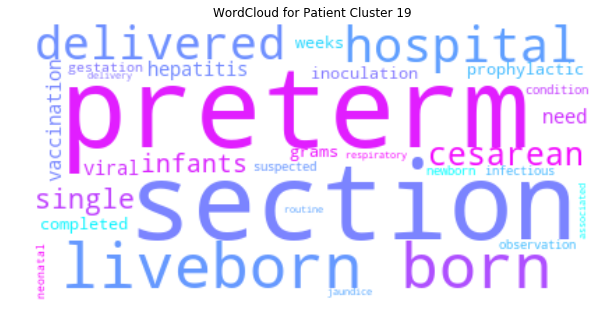

Counter({'preterm': 490, 'section': 459, 'liveborn': 458, 'born': 457, 'hospital': 457, 'delivered': 457, 'cesarean': 457, 'single': 453, 'infants': 384, 'hepatitis': 381, 'viral': 374, 'vaccination': 370, 'need': 369, 'prophylactic': 369, 'inoculation': 369, 'grams': 364, 'completed': 337, 'weeks': 337, 'gestation': 337, 'suspected': 287, 'observation': 285, 'condition': 282, 'newborn': 280, 'infectious': 252, 'neonatal': 201, 'jaundice': 149, 'delivery': 143, 'associated': 141, 'routine': 140, 'respiratory': 138, 'syndrome': 132, 'ritual': 131, 'circumcision': 131, 'transitory': 113, 'tachypnea': 110, 'conditions': 75, 'cardiac': 71, 'distress': 71, 'birth': 59, 'problems': 54, 'congenital': 50, 'perinatal': 48, 'infant': 47, 'undiagnosed': 46, 'murmurs': 46, 'originating': 44, 'period': 44, 'apnea': 42, 'dates': 42, 'diabetic': 38, 'artery': 38, 'mother': 37, 'atherosclerosis': 37, 'primary': 36, 'anemia': 36, 'pneumonia': 35, 'native': 34, 'hemorrhage': 33, 'heavy': 33, 'metabolic'

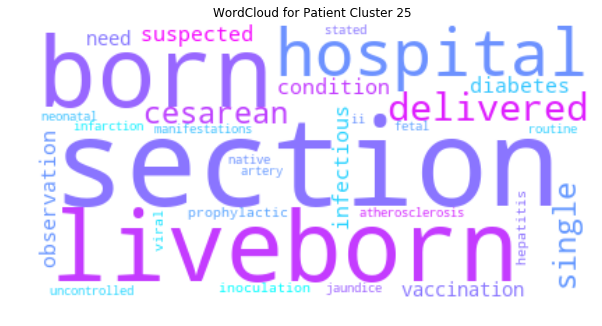

Counter({'section': 325, 'liveborn': 324, 'born': 324, 'hospital': 324, 'delivered': 324, 'cesarean': 324, 'single': 323, 'suspected': 287, 'observation': 283, 'condition': 281, 'infectious': 267, 'diabetes': 260, 'need': 240, 'vaccination': 240, 'prophylactic': 239, 'hepatitis': 239, 'inoculation': 238, 'viral': 237, 'uncontrolled': 186, 'atherosclerosis': 181, 'native': 167, 'ii': 155, 'artery': 149, 'neonatal': 147, 'manifestations': 147, 'stated': 147, 'fetal': 131, 'jaundice': 120, 'routine': 111, 'infarction': 110, 'ritual': 104, 'circumcision': 104, 'status': 101, 'newborn': 97, 'personal': 91, 'hyperlipidemia': 87, 'neurological': 87, 'operation': 81, 'term': 75, 'site': 75, 'dates': 74, 'respiratory': 74, 'polyneuropathy': 72, 'graft': 70, 'bypass': 69, 'infection': 69, 'infants': 67, 'current': 67, 'long': 66, 'anemia': 65, 'heavy': 62, 'abnormal': 62, 'disorders': 60, 'syndrome': 59, 'causing': 59, 'reaction': 56, 'hemorrhage': 56, 'urinary': 55, 'patient': 53, 'later': 53, 

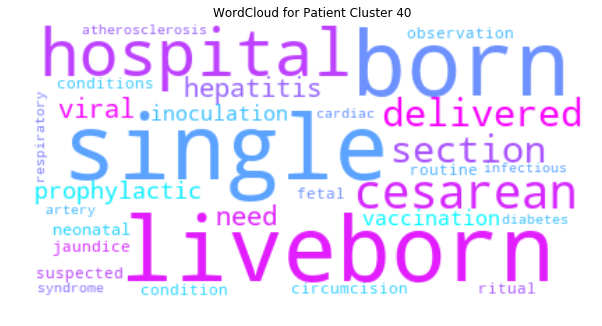

Counter({'single': 360, 'liveborn': 360, 'born': 359, 'hospital': 359, 'cesarean': 359, 'delivered': 358, 'section': 358, 'hepatitis': 315, 'viral': 314, 'need': 310, 'prophylactic': 309, 'vaccination': 309, 'inoculation': 309, 'neonatal': 166, 'fetal': 126, 'jaundice': 122, 'suspected': 121, 'observation': 119, 'routine': 113, 'ritual': 105, 'circumcision': 105, 'condition': 101, 'conditions': 100, 'infectious': 84, 'diabetes': 80, 'syndrome': 75, 'cardiac': 73, 'respiratory': 69, 'atherosclerosis': 68, 'artery': 68, 'uncontrolled': 64, 'native': 64, 'diabetic': 61, 'newborn': 61, 'stated': 59, 'infant': 59, 'personal': 56, 'neoplasm': 56, 'infarction': 51, 'malignant': 51, 'perinatal': 51, 'period': 51, 'originating': 50, 'undiagnosed': 50, 'murmurs': 50, 'mother': 49, 'anemia': 48, 'birth': 44, 'problems': 43, 'juvenile': 41, 'septal': 40, 'defect': 40, 'manifestations': 39, 'site': 38, 'ventricular': 38, 'infection': 37, 'dates': 37, 'atrial': 36, 'infants': 36, 'heavy': 33, 'statu

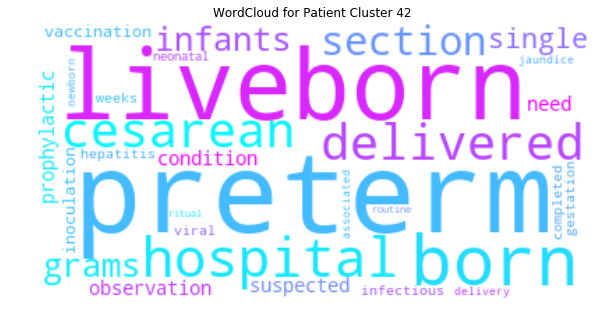

Counter({'preterm': 515, 'liveborn': 376, 'born': 375, 'hospital': 375, 'delivered': 368, 'cesarean': 368, 'section': 368, 'grams': 365, 'infants': 354, 'single': 326, 'suspected': 321, 'observation': 320, 'condition': 320, 'need': 317, 'prophylactic': 317, 'vaccination': 317, 'inoculation': 317, 'hepatitis': 317, 'viral': 316, 'completed': 287, 'weeks': 287, 'gestation': 287, 'infectious': 286, 'neonatal': 250, 'jaundice': 190, 'newborn': 176, 'delivery': 172, 'associated': 171, 'routine': 111, 'ritual': 106, 'circumcision': 106, 'birth': 101, 'respiratory': 91, 'transitory': 59, 'tachypnea': 56, 'syndrome': 54, 'twin': 50, 'mate': 50, 'problems': 45, 'fetal': 42, 'hypoglycemia': 39, 'distress': 38, 'genetic': 32, 'metabolic': 32, 'apnea': 28, 'congenital': 28, 'primary': 26, 'infarction': 24, 'dates': 22, 'conditions': 22, 'fetus': 22, 'hypothermia': 22, 'cardiac': 20, 'artery': 19, 'anemia': 19, 'personal': 19, 'infection': 18, 'site': 18, 'infant': 16, 'neoplasm': 16, 'status': 16,

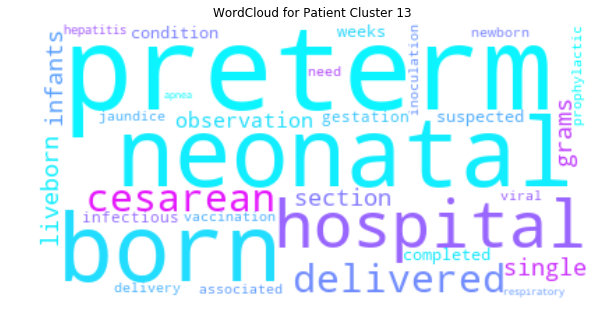

Counter({'preterm': 554, 'neonatal': 350, 'born': 328, 'hospital': 328, 'delivered': 327, 'cesarean': 327, 'section': 327, 'liveborn': 325, 'grams': 312, 'single': 311, 'infants': 308, 'observation': 293, 'suspected': 293, 'condition': 291, 'completed': 286, 'weeks': 286, 'gestation': 286, 'infectious': 284, 'newborn': 258, 'jaundice': 258, 'associated': 252, 'delivery': 251, 'need': 226, 'prophylactic': 226, 'vaccination': 226, 'inoculation': 226, 'viral': 225, 'hepatitis': 225, 'respiratory': 121, 'apnea': 106, 'primary': 96, 'routine': 83, 'syndrome': 79, 'ritual': 78, 'circumcision': 78, 'distress': 64, 'birth': 63, 'transitory': 54, 'bradycardia': 51, 'tachypnea': 47, 'problems': 45, 'conditions': 41, 'atherosclerosis': 30, 'artery': 29, 'hemorrhage': 29, 'infection': 28, 'native': 28, 'personal': 28, 'congenital': 25, 'rash': 24, 'anemia': 24, 'site': 24, 'diaper': 23, 'napkin': 23, 'infarction': 22, 'perinatal': 22, 'period': 22, 'diabetes': 21, 'status': 21, 'malignant': 21, 'o

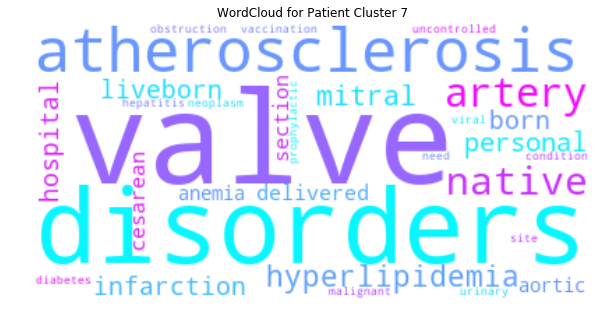

Counter({'valve': 191, 'disorders': 149, 'atherosclerosis': 132, 'artery': 126, 'native': 116, 'hyperlipidemia': 114, 'mitral': 105, 'personal': 98, 'infarction': 86, 'liveborn': 85, 'born': 84, 'hospital': 84, 'delivered': 84, 'cesarean': 84, 'section': 84, 'aortic': 76, 'anemia': 76, 'neoplasm': 75, 'hepatitis': 73, 'obstruction': 73, 'site': 71, 'diabetes': 68, 'viral': 68, 'urinary': 68, 'malignant': 67, 'condition': 66, 'uncontrolled': 65, 'need': 64, 'prophylactic': 64, 'vaccination': 64, 'inoculation': 64, 'infection': 64, 'status': 63, 'ii': 62, 'single': 61, 'atrial': 61, 'stated': 60, 'procedure': 58, 'suspected': 57, 'congestive': 55, 'cerebral': 55, 'infectious': 55, 'mellitus': 54, 'esophageal': 54, 'reflux': 53, 'observation': 53, 'fibrillation': 53, 'fracture': 52, 'hemorrhage': 51, 'preterm': 49, 'tract': 49, 'closed': 49, 'causing': 49, 'cardiac': 48, 'abnormal': 47, 'pure': 45, 'hypercholesterolemia': 45, 'pulmonary': 45, 'insufficiency': 44, 'reaction': 42, 'iatrogen

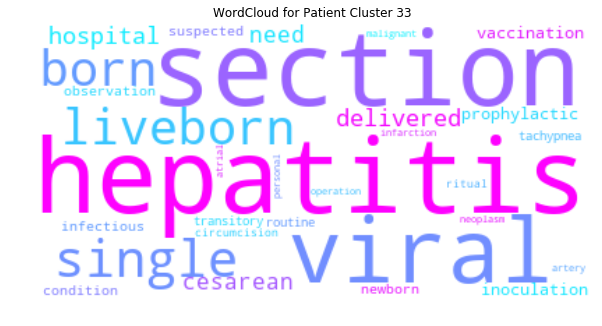

Counter({'hepatitis': 247, 'section': 245, 'viral': 245, 'single': 244, 'liveborn': 244, 'born': 244, 'hospital': 244, 'delivered': 244, 'cesarean': 244, 'need': 243, 'prophylactic': 243, 'vaccination': 243, 'inoculation': 243, 'newborn': 150, 'suspected': 149, 'observation': 147, 'condition': 147, 'infectious': 135, 'transitory': 117, 'tachypnea': 117, 'routine': 105, 'ritual': 88, 'circumcision': 88, 'atrial': 66, 'personal': 58, 'neoplasm': 55, 'infarction': 55, 'malignant': 54, 'artery': 52, 'operation': 51, 'infection': 50, 'infants': 48, 'site': 45, 'abnormal': 45, 'heavy': 44, 'dates': 44, 'conditions': 43, 'cerebral': 41, 'atherosclerosis': 40, 'anemia': 39, 'ostium': 38, 'secundum': 38, 'septal': 38, 'defect': 38, 'reaction': 38, 'causing': 37, 'status': 36, 'time': 35, 'respiratory': 34, 'native': 34, 'patient': 34, 'later': 34, 'misadventure': 34, 'complications': 32, 'diabetes': 31, 'neonatal': 31, 'procedure': 31, 'disorders': 30, 'surgical': 30, 'uncontrolled': 29, 'cardi

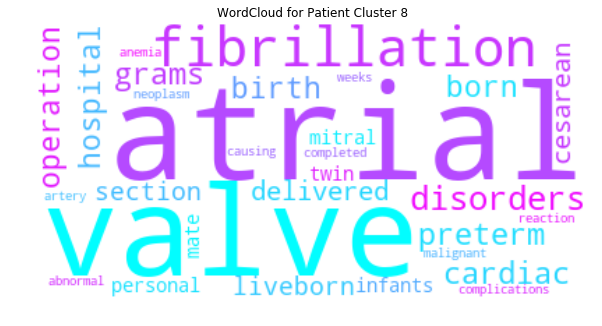

Counter({'atrial': 192, 'valve': 177, 'fibrillation': 167, 'disorders': 146, 'preterm': 125, 'cardiac': 125, 'grams': 120, 'birth': 112, 'operation': 111, 'born': 109, 'hospital': 109, 'delivered': 109, 'cesarean': 109, 'section': 109, 'liveborn': 108, 'personal': 105, 'mitral': 98, 'twin': 95, 'mate': 95, 'infants': 93, 'complications': 88, 'abnormal': 84, 'malignant': 83, 'reaction': 81, 'causing': 80, 'neoplasm': 79, 'anemia': 76, 'artery': 76, 'completed': 75, 'weeks': 75, 'gestation': 75, 'time': 75, 'patient': 74, 'later': 74, 'misadventure': 74, 'atherosclerosis': 74, 'infection': 73, 'neonatal': 72, 'diabetes': 72, 'pulmonary': 69, 'site': 69, 'infarction': 64, 'native': 64, 'urinary': 62, 'procedure': 61, 'congestive': 61, 'hemorrhage': 60, 'uncontrolled': 59, 'newborn': 56, 'surgical': 55, 'stated': 55, 'aortic': 52, 'tract': 52, 'obstruction': 47, 'ii': 46, 'jaundice': 44, 'status': 44, 'hyperlipidemia': 43, 'current': 41, 'iatrogenic': 41, 'fetal': 40, 'implant': 40, 'condi

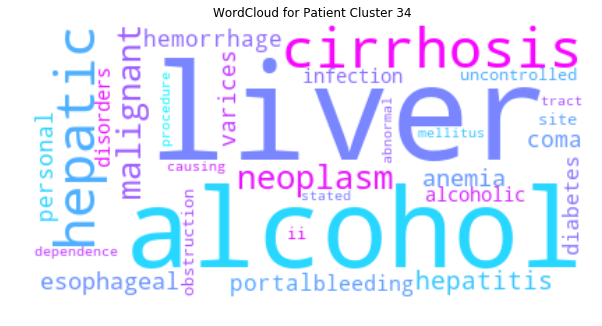

Counter({'liver': 411, 'alcohol': 268, 'cirrhosis': 229, 'hepatic': 218, 'neoplasm': 218, 'malignant': 209, 'hepatitis': 205, 'esophageal': 180, 'anemia': 176, 'portal': 157, 'hemorrhage': 154, 'coma': 153, 'personal': 151, 'varices': 151, 'bleeding': 138, 'diabetes': 137, 'infection': 136, 'alcoholic': 130, 'disorders': 126, 'uncontrolled': 125, 'site': 120, 'ii': 119, 'obstruction': 116, 'dependence': 114, 'stated': 112, 'causing': 110, 'tract': 110, 'mellitus': 106, 'procedure': 104, 'abnormal': 100, 'primary': 91, 'secondary': 90, 'status': 88, 'posthemorrhagic': 87, 'urinary': 87, 'effects': 85, 'encephalopathy': 84, 'operation': 81, 'syndrome': 79, 'tobacco': 77, 'reaction': 77, 'ascites': 75, 'viral': 74, 'adverse': 72, 'therapeutic': 70, 'thrombocytopenia': 70, 'conditions': 69, 'pulmonary': 68, 'patient': 68, 'necrosis': 66, 'later': 64, 'misadventure': 64, 'time': 64, 'current': 61, 'deficiency': 60, 'duodenum': 60, 'surgical': 57, 'stomach': 57, 'ulcer': 56, 'infarction': 55

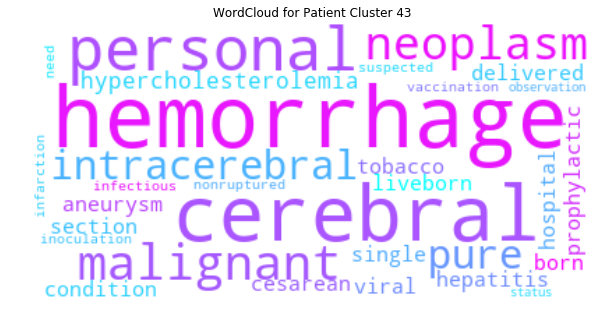

Counter({'hemorrhage': 143, 'cerebral': 114, 'personal': 99, 'malignant': 89, 'neoplasm': 86, 'intracerebral': 79, 'pure': 77, 'hypercholesterolemia': 76, 'aneurysm': 64, 'hepatitis': 64, 'tobacco': 64, 'delivered': 63, 'condition': 61, 'section': 59, 'viral': 59, 'single': 57, 'liveborn': 57, 'cesarean': 57, 'born': 56, 'hospital': 56, 'prophylactic': 56, 'nonruptured': 55, 'infectious': 55, 'need': 55, 'vaccination': 55, 'inoculation': 55, 'suspected': 54, 'infarction': 54, 'observation': 53, 'status': 53, 'closed': 52, 'fracture': 51, 'anemia': 49, 'stage': 48, 'obstructive': 47, 'fetal': 46, 'neonatal': 46, 'jaundice': 46, 'procedure': 46, 'disorders': 46, 'diabetes': 44, 'wound': 44, 'open': 42, 'uncontrolled': 41, 'ii': 39, 'secondary': 37, 'migraine': 36, 'site': 36, 'conditions': 36, 'esophageal': 35, 'artery': 34, 'reflux': 34, 'intractable': 33, 'stated': 33, 'abnormal': 33, 'brain': 32, 'acquired': 31, 'obstruction': 31, 'infection': 31, 'operation': 31, 'causing': 31, 'epil

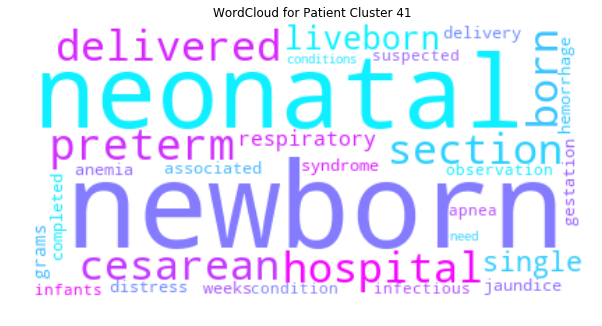

Counter({'newborn': 292, 'neonatal': 207, 'preterm': 206, 'section': 197, 'born': 196, 'hospital': 196, 'delivered': 196, 'cesarean': 196, 'liveborn': 194, 'single': 191, 'respiratory': 170, 'grams': 134, 'syndrome': 123, 'jaundice': 122, 'associated': 118, 'delivery': 117, 'anemia': 116, 'completed': 111, 'weeks': 111, 'gestation': 111, 'distress': 109, 'hemorrhage': 103, 'suspected': 98, 'condition': 94, 'apnea': 93, 'observation': 93, 'infectious': 93, 'infants': 90, 'conditions': 88, 'need': 88, 'prophylactic': 88, 'vaccination': 88, 'inoculation': 88, 'primary': 79, 'viral': 76, 'hepatitis': 76, 'perinatal': 74, 'period': 72, 'infection': 71, 'neoplasm': 71, 'obstruction': 70, 'malignant': 70, 'personal': 67, 'site': 64, 'prematurity': 60, 'routine': 57, 'ritual': 55, 'circumcision': 55, 'urinary': 54, 'atherosclerosis': 53, 'artery': 51, 'patent': 49, 'ductus': 49, 'arteriosus': 49, 'septicemia': 47, 'native': 47, 'status': 47, 'pure': 45, 'causing': 45, 'hypercholesterolemia': 4

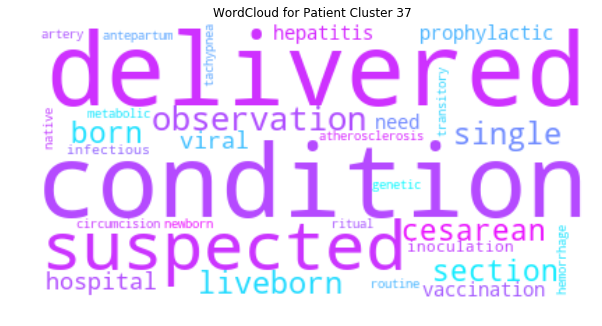

Counter({'condition': 338, 'delivered': 328, 'suspected': 250, 'observation': 247, 'liveborn': 207, 'single': 206, 'cesarean': 193, 'section': 193, 'born': 189, 'hospital': 189, 'viral': 180, 'hepatitis': 180, 'prophylactic': 177, 'need': 176, 'vaccination': 176, 'inoculation': 176, 'infectious': 149, 'newborn': 117, 'routine': 112, 'ritual': 110, 'circumcision': 110, 'metabolic': 98, 'genetic': 97, 'antepartum': 88, 'artery': 85, 'atherosclerosis': 85, 'hemorrhage': 83, 'transitory': 81, 'tachypnea': 80, 'native': 80, 'anemia': 78, 'dates': 75, 'postpartum': 75, 'infants': 72, 'heavy': 71, 'infarction': 65, 'personal': 63, 'status': 59, 'site': 56, 'conditions': 54, 'infection': 51, 'cerebral': 50, 'hyperlipidemia': 48, 'abnormal': 46, 'diabetes': 45, 'urinary': 43, 'disorders': 43, 'stage': 41, 'ii': 39, 'uncontrolled': 39, 'causing': 39, 'malignant': 39, 'term': 38, 'mother': 38, 'procedure': 38, 'neoplasm': 38, 'current': 37, 'neonatal': 37, 'tract': 37, 'delivery': 36, 'stated': 3

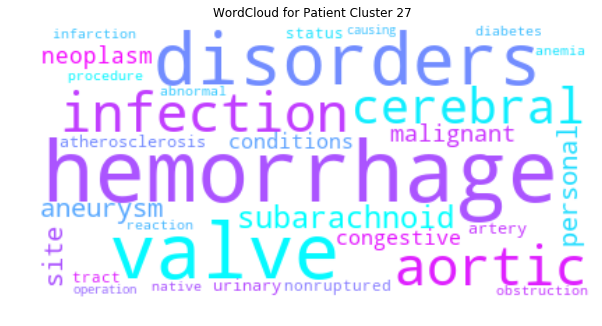

Counter({'hemorrhage': 154, 'valve': 124, 'disorders': 108, 'infection': 101, 'aortic': 100, 'cerebral': 98, 'subarachnoid': 97, 'aneurysm': 90, 'site': 86, 'personal': 85, 'malignant': 77, 'neoplasm': 72, 'conditions': 62, 'congestive': 61, 'urinary': 58, 'atherosclerosis': 58, 'artery': 57, 'nonruptured': 55, 'tract': 54, 'status': 54, 'procedure': 54, 'infarction': 51, 'reaction': 49, 'anemia': 48, 'native': 46, 'diabetes': 46, 'abnormal': 44, 'obstruction': 43, 'operation': 43, 'causing': 42, 'graft': 40, 'uncontrolled': 39, 'ii': 38, 'tobacco': 37, 'pulmonary': 36, 'surgical': 35, 'patient': 35, 'cardiac': 35, 'stage': 35, 'insufficiency': 34, 'thoracic': 33, 'rupture': 33, 'complications': 33, 'later': 33, 'misadventure': 33, 'time': 33, 'esophageal': 32, 'respiratory': 32, 'stated': 32, 'reflux': 31, 'obstructive': 31, 'implant': 31, 'acquired': 31, 'effects': 29, 'vascular': 28, 'streptococcus': 28, 'congenital': 28, 'ulcer': 27, 'pure': 26, 'mellitus': 26, 'hepatitis': 25, 'se

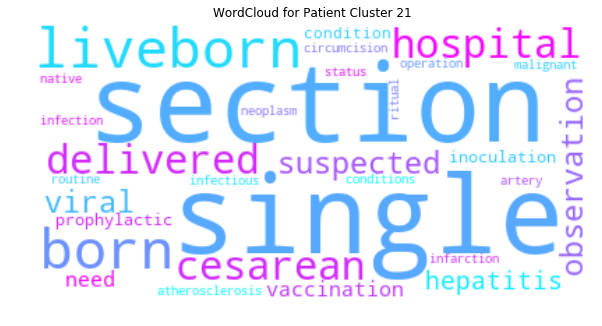

Counter({'section': 188, 'single': 187, 'liveborn': 186, 'born': 186, 'hospital': 186, 'delivered': 186, 'cesarean': 186, 'suspected': 164, 'observation': 163, 'viral': 162, 'hepatitis': 162, 'vaccination': 158, 'need': 157, 'prophylactic': 157, 'inoculation': 157, 'condition': 140, 'atherosclerosis': 96, 'infectious': 94, 'routine': 91, 'ritual': 91, 'circumcision': 91, 'malignant': 89, 'native': 87, 'artery': 86, 'neoplasm': 85, 'infection': 82, 'status': 73, 'operation': 72, 'infarction': 70, 'conditions': 68, 'personal': 66, 'site': 64, 'obstruction': 61, 'diabetes': 57, 'causing': 56, 'anemia': 53, 'uncontrolled': 52, 'abnormal': 52, 'ii': 51, 'neonatal': 49, 'atrial': 48, 'stated': 48, 'metabolic': 45, 'mellitus': 45, 'urinary': 44, 'genetic': 44, 'secondary': 44, 'surgical': 43, 'fibrillation': 42, 'reaction': 42, 'pulmonary': 41, 'cardiac': 40, 'hemorrhage': 39, 'septicemia': 39, 'bypass': 38, 'graft': 38, 'hyperlipidemia': 37, 'fetal': 37, 'implant': 36, 'patient': 36, 'later'

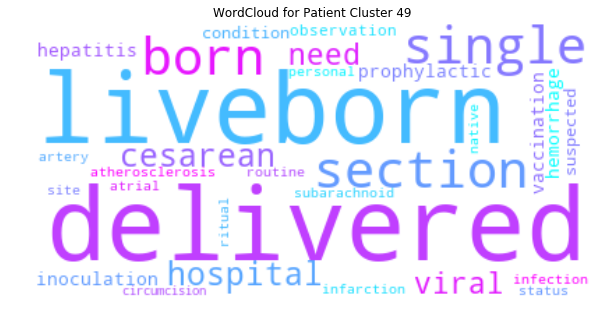

Counter({'delivered': 147, 'liveborn': 137, 'single': 136, 'section': 136, 'born': 135, 'hospital': 135, 'cesarean': 135, 'need': 114, 'viral': 114, 'prophylactic': 113, 'vaccination': 113, 'inoculation': 113, 'hepatitis': 112, 'hemorrhage': 110, 'condition': 100, 'suspected': 92, 'observation': 88, 'infection': 82, 'atherosclerosis': 79, 'artery': 75, 'infarction': 73, 'native': 67, 'site': 66, 'personal': 66, 'subarachnoid': 66, 'status': 64, 'atrial': 61, 'routine': 60, 'ritual': 60, 'circumcision': 60, 'conditions': 57, 'neoplasm': 56, 'malignant': 55, 'anemia': 55, 'infectious': 49, 'cerebral': 49, 'abnormal': 48, 'causing': 44, 'operation': 44, 'urinary': 43, 'tract': 43, 'procedure': 43, 'respiratory': 42, 'cardiac': 42, 'obstruction': 42, 'reaction': 39, 'disorders': 39, 'metabolic': 37, 'fibrillation': 36, 'genetic': 36, 'graft': 35, 'newborn': 34, 'infants': 33, 'patient': 32, 'later': 32, 'misadventure': 32, 'time': 32, 'obstructive': 32, 'bypass': 31, 'defect': 30, 'surgica

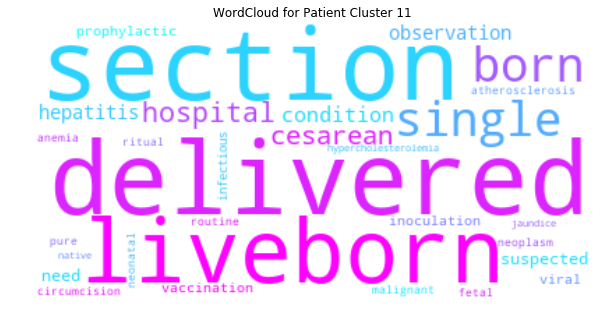

Counter({'delivered': 159, 'section': 155, 'liveborn': 154, 'single': 153, 'born': 153, 'hospital': 153, 'cesarean': 153, 'condition': 140, 'hepatitis': 131, 'observation': 131, 'suspected': 131, 'need': 130, 'prophylactic': 130, 'vaccination': 130, 'inoculation': 130, 'viral': 130, 'infectious': 112, 'neonatal': 86, 'routine': 79, 'ritual': 79, 'circumcision': 79, 'malignant': 70, 'neoplasm': 67, 'fetal': 64, 'atherosclerosis': 61, 'anemia': 58, 'pure': 56, 'hypercholesterolemia': 56, 'jaundice': 55, 'native': 52, 'artery': 52, 'newborn': 52, 'secondary': 47, 'hemorrhage': 46, 'operation': 45, 'personal': 44, 'graft': 40, 'obstruction': 37, 'status': 37, 'loss': 36, 'causing': 35, 'implant': 32, 'syndrome': 32, 'procedure': 32, 'site': 31, 'deficiency': 31, 'reaction': 30, 'bypass': 30, 'diabetes': 30, 'fracture': 30, 'infarction': 29, 'complications': 29, 'urinary': 29, 'surgical': 28, 'iron': 28, 'blood': 28, 'vascular': 27, 'uncontrolled': 27, 'abnormal': 26, 'mellitus': 25, 'compl

In [7]:
for c, size in clusters_by_size:
    print(size)
    print(cp.get_cluster_wordcloud(c))

In [ ]:
# def plot_icd_distribution(topk):

remaining_patient_idxs = cluster_assignments["ORIGINAL_INDEX"].values
remaining_patient_icd_binary = patient_icd_binary[remaining_patient_idxs]

patient_as_icd_codes = []
patient_as_titles = []

for i in tqdm(range(remaining_patient_icd_binary.shape[0])):
    patient_icd_idx = np.nonzero(remaining_patient_icd_binary[i])[1]

    patient_icd_codes = icd9codes.iloc[patient_icd_idx].values.flatten()
    patient_icd_codes_str = " ".join(patient_icd_codes)
    patient_as_icd_codes.append(patient_icd_codes_str)

    patient_titles = icd9diag[icd9diag["ICD9_CODE"].isin(patient_icd_codes)]["LONG_TITLE"].values.tolist()
    patient_titles_str = " ".join(patient_titles).lower()
    patient_as_titles.append(patient_titles_str)
    

In [ ]:
icd_tfidf = TfidfVectorizer().fit(patient_as_icd_codes)
title_tfidf = TfidfVectorizer().fit(patient_as_titles)

icd_count = CountVectorizer().fit(patient_as_icd_codes)
title_count = CountVectorizer().fit(patient_as_titles)